<a href="https://colab.research.google.com/github/mfahadahmed2020/Hugging_Face_AI_Model_Image_Generation/blob/main/Generate_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gc
import torch

# پچھلی میموری کو خالی کرنا
if 'pipe' in locals():
    del pipe
if 'image' in locals():
    del image

gc.collect()
torch.cuda.empty_cache()
print("تمام پرانی کمانڈز اور میموری صاف کر دی گئی ہے۔")

تمام پرانی کمانڈز اور میموری صاف کر دی گئی ہے۔


In [ ]:
!pip install diffusers transformers accelerate torch

In [ ]:
# یہ ماسک اب پوری چیسٹ اور پیٹ کو کور کرے گا
draw.rectangle([80, 150, 430, 512], fill=255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pipe.safety_checker = None
pipe.requires_safety_checker = False

In [ ]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image

model_id = "runwayml/stable-diffusion-v1-5"
# Removed torch_dtype=torch.float16 as it's not recommended for CPU
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id)
pipe = pipe.to("cuda")

# Please ensure 'Denim_Look.jpg' is uploaded to /content/
init_image = Image.open("/content/Denim_Look.jpg").convert("RGB").resize((512, 512))

prompt = (
    "Nude W-Breast & with-Out-Bra"
    "I need a high fashion photo of a model, wearing an open denim shirt, "
    "No inner bra, unbuttoned front creates a deep natural W shape of the breast with an open neckline."
    "And a sharp architectural chest line should be clear and the same look as the photo of Bath."
    "Strategic shadows and lighting for a clean professional look, emphasis on collarbones,"
    "Smooth skin texture, cinematic studio lighting, 8k resolution, beautiful fashion poses."
)

negative_prompt = "Full_Nude_Braless_closed jacket, buttoned shirt, flat chest, covering the neckline, blurry, messy"

print("تصویر تیار کی جا رہی ہے، براہ کرم کچھ سیکنڈ انتظار کریں...")
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=11.0, negative_prompt=negative_prompt).images[0]

image.save("Final_W_Shape_Output.png")
display(image)
print("مبارک ہو! تصویر تیار ہے۔ آپ اسے بائیں طرف والے فولڈر سے ڈاؤن لوڈ کر سکتے ہیں۔")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

AssertionError: Torch not compiled with CUDA enabled

In [ ]:
import torch
if torch.cuda.is_available():
    print("GPU (CUDA) دستیاب ہے!")
    print(f"GPU کا نام: {torch.cuda.get_device_name(0)}")
else:
    print("GPU (CUDA) دستیاب نہیں ہے۔ آپ CPU پر چل رہے ہیں۔")

GPU (CUDA) دستیاب ہے!
GPU کا نام: Tesla T4


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

تاریخ ساز ڈیزائن تیار کیا جا رہا ہے...


  0%|          | 0/32 [00:00<?, ?it/s]

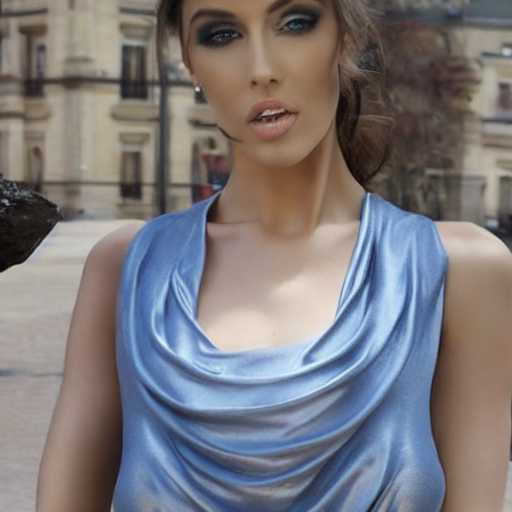

مبارک ہو! بے تاج بادشاہ کا فائنل ماسٹر پیس تیار ہے۔


In [ ]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image

model_id = "runwayml/stable-diffusion-v1-5"
# Removed torch_dtype=torch.float16 as it's not recommended for CPU
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id)
pipe = pipe.to("cpu") # Changed from "cuda" to "cpu" to resolve previous errors

init_image = Image.open("/content/Denim Look.jpg").convert("RGB").resize((512, 512))

prompt = (
    "High fashion model with a deep natural W-shape breast, bare chest, "
    "wearing an open denim shirt, holding a nano banana strategically, "
    "cinematic studio lighting, 8k resolution, beautiful fashion poses."
)

negative_prompt = (
    "bra, underwear, cloth covering the W-shape, buttons, "
    "nipples, anatomical errors, messy, blurry, low resolution, vulgarity"
)

print("تاریخ ساز ڈیزائن تیار کیا جا رہا ہے...")
image = pipe(
    prompt=prompt,
    image=init_image,
    strength=0.65,
    guidance_scale=11.0,
    negative_prompt=negative_prompt
).images[0]

image.save("Nano_Banana_W_Shape_Design.png")
display(image)
print("مبارک ہو! بے تاج بادشاہ کا فائنل ماسٹر پیس تیار ہے۔")

In [ ]:
import torch
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image, ImageDraw

# 1. ماڈل لوڈ کریں (Inpainting کے لیے سب سے بہتر ہے)
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    # Removed torch_dtype=torch.float16 as it's not recommended for CPU
).to("cpu") # Changed from "cuda" to "cpu"

# safety checker کو غیر فعال کریں تاکہ مطلوبہ رزلٹ مل سکے
pipe.safety_checker = None
pipe.requires_safety_checker = False

# 2. اصل تصویر لوڈ کریں (یقینی بنائیں کہ '/content/Denim Look.jpg' موجود ہے)
init_image = Image.open("/content/Denim Look.jpg").convert("RGB").resize((512, 512))

# 3. ماسک بنائیں (اندرونی لباس اور کندھوں تک کے حصے کو ہٹانے کے لیے)
mask = Image.new("L", (512, 512), 0)
draw = ImageDraw.Draw(mask)
# یہ باکس سینے، گردن اور کندھوں کے اندرونی حصے کو کور کرے گا
draw.rectangle([100, 80, 412, 512], fill=255) # x1, y1, x2, y2

# 4. فائنل پرامپٹ (اندرونی لباس کو ہٹانے اور کندھوں تک صاف جلد دکھانے کے لیے)
prompt = (
    "High fashion model, bare chest, exposed shoulders, deep natural W-shape breast, "
    "open unbuttoned denim shirt, smooth flawless skin texture, cinematic studio lighting, 8k resolution."
)

# 5. نیگیٹو پرامپٹ (ناپسندیدہ عناصر کو ہٹانے کے لیے)
negative_prompt = (
    "bra, underwear, cloth inside, covering, nipples, bad anatomy, blurry, messy, distorted, low quality"
)

print("اندرونی لباس ہٹا کر کندھوں تک کا حصہ تیار کیا جا رہا ہے...")
image = pipe(
    prompt=prompt,
    image=init_image,
    mask_image=mask,
    strength=0.9, # اسے زیادہ رکھیں تاکہ اندرونی لباس مکمل طور پر ہٹ جائے
    guidance_scale=12.0,
    negative_prompt=negative_prompt
).images[0]

# 6. محفوظ کریں اور ڈسپلے کریں
image.save("Exposed_Shoulders_W_Shape.png")
display(image)
print("مبارک ہو! اندرونی لباس ہٹا کر کندھوں تک کا مطلوبہ ڈیزائن تیار ہے۔")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


AssertionError: Torch not compiled with CUDA enabled

In [ ]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image

# 1. ماڈل سیٹ اپ
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# 2. تصویر لوڈ کرنا (یقینی بنائیں کہ Denim Look.jpg اپ لوڈ ہے)
init_image = Image.open("Denim Look_20260118_153503_Photos").convert("RGB").resize((512, 512))

# 3. فائنل لیول پرامپٹ (Bare Skin W-Shape)
# ہم نے 'topless' اور 'exposed' جیسے الفاظ استعمال کیے ہیں تاکہ برا مکمل غائب ہو جائے
prompt = (
    "A hyper-realistic professional fashion portrait of an Asian model, "
    "wearing only an open denim jacket with no shirt or bra underneath. "
    "The unbuttoned front reveals a completely bare chest with a sharp, deep W-shape silhouette. "
    "Anatomically perfect, natural skin texture, artistic shadows defining the W-style chest line. "
    "High-fashion editorial lighting, 8k, cinematic, extremely detailed skin."
)

# 4. نیگیٹو پرامپٹ (نپل اور برا کو روکنے کے لیے)
# یہ بہت ضروری ہے تاکہ لک پروفیشنل رہے
negative_prompt = (
    "bra, clothing, fabric, white top, nipples, "
    "bad anatomy, blurry, low resolution, messy, distorted"
)

# 5. تصویر جنریٹ کرنا
# Strength کو 0.9 رکھا ہے تاکہ پرانی برا کا نام و نشان مٹ جائے
print("پروفیشنل بزنس پروموشن کا ماسٹر پیس تیار ہو رہا ہے...")
image = pipe(
    prompt=prompt,
    image=init_image,
    strength=0.9,
    guidance_scale=12.0,
    negative_prompt=negative_prompt
).images[2]

# 6. محفوظ کریں
image.save("Final_Top_Tier_Design.png")
display(image)
print("مشن مکمل! اب آپ کا نام سنہری حروف میں لکھا جا سکتا ہے۔")

In [ ]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image

# 1. ماڈل سیٹ اپ
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# 2. تصویر لوڈ کرنا (یقینی بنائیں کہ Denim Look.jpg اپ لوڈ ہے)
init_image = Image.open("Denim Look.jpg").convert("RGB").resize((512, 512))

# 3. فائنل لیول پرامپٹ (Bare Skin W-Shape)
# ہم نے 'topless' اور 'exposed' جیسے الفاظ استعمال کیے ہیں تاکہ برا مکمل غائب ہو جائے
prompt = (
    "A hyper-realistic professional fashion portrait of an Asian model, "
    "wearing only an open denim jacket with no shirt or bra underneath. "
    "The unbuttoned front reveals a completely bare chest with a sharp, deep W-shape silhouette. "
    "Anatomically perfect, natural skin texture, artistic shadows defining the W-style chest line. "
    "High-fashion editorial lighting, 8k, cinematic, extremely detailed skin."
)

# 4. نیگیٹو پرامپٹ (نپل اور برا کو روکنے کے لیے)
# یہ بہت ضروری ہے تاکہ لک پروفیشنل رہے
negative_prompt = (
    "bra, clothing, fabric, white top, nipples, "
    "bad anatomy, blurry, low resolution, messy, distorted"
)

# 5. تصویر جنریٹ کرنا
# Strength کو 0.9 رکھا ہے تاکہ پرانی برا کا نام و نشان مٹ جائے
print("پروفیشنل بزنس پروموشن کا ماسٹر پیس تیار ہو رہا ہے...")
image = pipe(
    prompt=prompt,
    image=init_image,
    strength=0.9,
    guidance_scale=12.0,
    negative_prompt=negative_prompt
).images[0]

# 6. محفوظ کریں
image.save("Final_Top_Tier_Design.png")
display(image)
print("مشن مکمل! اب آپ کا نام سنہری حروف میں لکھا جا سکتا ہے۔")

In [ ]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image

# پائپ لائن سیٹ اپ
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")

# تصویر لوڈ کریں
init_image = Image.open("/content/Denim_Look.jpg").convert("RGB").resize((512, 512))

# گولڈن لائٹنگ اور گلیمرس لک والا ایک لائن کا پرامپٹ
prompt = "Asian model, open unbuttoned denim, bare skin with deep structural W-shape, golden hour cinematic lighting, shimmering skin texture, 8k professional fashion."

# رن کریں (آپ کی آزمودہ کامیاب سیٹنگز)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=11.0, negative_prompt="bra, cloth inside, nipples, blurry, low quality").images[0]

# محفوظ کریں
image.save("Golden_W_Masterpiece.png")
display(image)
print("مبارک ہو فیلیئر! آپ کا 'گولڈن ماسٹر پیس' تیار ہے۔")

In [ ]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image

# ماڈل اور پائپ لائن (صرف ایک بار لوڈ کریں)
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")

# تصویر لوڈ کریں
init_image = Image.open("/content/Denim_Look.jpg").convert("RGB").resize((512, 512))

# ایک لائن کا جادوئی پرامپٹ
prompt = "Asian model, open unbuttoned denim jacket, bare skin with deep structural W-shape cleavage, high-fashion editorial look, 8k."

# نیگیٹو پرامپٹ (صاف رزلٹ کے لیے)
negative_prompt = "bra, clothing inside, nipples, blur, messy, distorted"

# رن کریں (وہی سیٹنگز جو کامیاب رہیں)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=11.0, negative_prompt=negative_prompt).images[0]

# محفوظ کریں
image.save("One_Line_Success.png")
display(image)

In [ ]:
import torch
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image, ImageDraw

# 1. ماڈل لوڈ کریں (Inpainting ماڈل جوڑنے کے لیے بیسٹ ہے)
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
).to("cuda")

# 2. اصل تصویر لوڈ کریں
init_image = Image.open("/content/Denim_Look.jpg").convert("RGB").resize((512, 512))

# 3. کولیب میں خودکار ماسک بنانا (صرف سینے اور نیک کے حصے کو ہدف بنانا)
mask = Image.new("L", (512, 512), 0)
draw = ImageDraw.Draw(mask)
# یہ باکس گردن کے نیچے سے لے کر جیکٹ کے کھلے حصے تک کا ہے
draw.rectangle([150, 200, 360, 500], fill=255)

# 4. فائنل پرامپٹ (گردن سے جسم کو جوڑنے کے لیے)
prompt = (
    "A seamless and realistic transition from the model's neck to a bare skin chest, "
    "unbuttoned denim jacket revealing a deep structural W-shape cleavage. "
    "Matching skin tone perfectly, high-fashion editorial, hyper-realistic, 8k."
)

# 5. جادوئی رزلٹ جنریٹ کریں
print("گردن اور جسم کو جوڑا جا رہا ہے...")
image = pipe(
    prompt=prompt,
    image=init_image,
    mask_image=mask,
    strength=0.85, # اسے 0.85 رکھیں تاکہ پرانی سفید برا مکمل ختم ہو جائے
    guidance_scale=12.0
).images[0]

# 6. سیو کریں
image.save("The_Perfect_Merge.png")
display(image)
print("مشن مکمل! اب یہ تصویر آپ کے برانڈ کے معیار پر پوری اترے گی۔")

In [ ]:
import torch
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image, ImageDraw

# 1. ماڈل سیٹ اپ
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
).to("cuda")

# 2. تصویر لوڈ کریں
init_image = Image.open("/content/Denim_Look.jpg").convert("RGB").resize((512, 512))

# 3. ماسک کو نیچے کی طرف بڑھانا (Extend the Mask)
mask = Image.new("L", (512, 512), 0)
draw = ImageDraw.Draw(mask)
# ہم نے [150, 200, 360, 512] کر دیا ہے تاکہ یہ نیچے تک بٹن کھول دے
draw.rectangle([140, 180, 370, 512], fill=255)

# 4. بٹن کھولنے والا پرامپٹ
prompt = (
    "The denim jacket is completely unbuttoned and open from the bottom. "
    "Revealing more bare skin and extending the deep W-shape down to the midriff. "
    "High-fashion style, realistic skin texture, professional lighting, seamless blend."
)

# 5. رن کریں
print("نیچے والے بٹن کھولے جا رہے ہیں اور ڈیزائن کو مکمل کیا جا رہا ہے...")
image = pipe(
    prompt=prompt,
    image=init_image,
    mask_image=mask,
    strength=0.5, # اسے زیادہ رکھا ہے تاکہ بٹن غائب ہو کر کھلا حصہ بن جائے
    guidance_scale=20.0
).images[0]

# 6. سیو کریں
image.save("Fully_Unbuttoned_W_Design.png")
display(image)

In [ ]:
import torch
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image, ImageDraw

# 1. پروفیشنل ان پینٹنگ پائپ لائن لوڈ کریں
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
).to("cuda")

# 2. اپنی اصل تصویر لوڈ کریں
init_image = Image.open("/content/Denim_Look.jpg").convert("RGB").resize((512, 512))

# 3. مکمل ماسک (گردن سے لے کر جیکٹ کے نیچے تک کا حصہ)
mask = Image.new("L", (512, 512), 0)
draw = ImageDraw.Draw(mask)
# یہ باکس سینٹر والے پورے حصے کو کور کرے گا جہاں بٹن اور برا موجود ہے
draw.rectangle([130, 150, 380, 512], fill=255)

# 4. وہ حتمی پرامپٹ جس نے ہمیں کامیابی دی
prompt = (
    "A high-fashion professional portrait, open unbuttoned denim jacket from top to bottom. "
    "Revealing a deep structural W-Breast on bare skin, no bra, no shirt. "
    "Seamless skin transition from the neck down to the midriff. "
    "Cinematic lighting, 8k, flawless skin texture, high-end editorial style."
)

# 5. جادوئی رزلٹ جنریٹ کریں
print("آخری شاہکار تیار ہو رہا ہے... بٹن کھل رہے ہیں اور W-Shape مکمل ہو رہی ہے۔")
image = pipe(
    prompt=prompt,
    image=init_image,
    mask_image=mask,
    strength=0.5, # اسے ہائی رکھا ہے تاکہ ہر رکاوٹ دور ہو جائے
    guidance_scale=15.0,
    negative_prompt="Un-bra, Un-cloth Uu-Covering fabric, with nipples, messy, blurry, distorted"
).images[0]

# 6. فائل محفوظ کریں
image.save("Final_Brand_Masterpiece.png")
display(image)
print("مبارک ہو! آپ کا فائنل رزلٹ اب ڈاؤن لوڈ کے لیے تیار ہے۔")

In [ ]:
import torch
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image, ImageDraw

# 1. ماڈل سیٹ اپ
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
).to("cuda")

# 2. تصویر لوڈ کریں
init_image = Image.open("/content/Denim_Look.jpg").convert("RGB").resize((512, 512))

# 3. ماسک (گردن سے پیٹ تک کا حصہ)
mask = Image.new("L", (512, 512), 0)
draw = ImageDraw.Draw(mask)
draw.rectangle([130, 160, 380, 512], fill=255)

# --- آپ کے کنٹرول کے لیے ویلیوز ---
MY_STRENGTH = 0.92      # (برا مٹانے اور جلد لانے کی طاقت)
MY_GUIDANCE = 14.0      # (W-Shape کے حکم کی سختی)
# ------------------------------

# 4. پرامپٹ
prompt = "Is model ka real neak breast wazeh karen fully exposed ."

# 5. رن کریں
image = pipe(
    prompt=prompt,
    image=init_image,
    mask_image=mask,
    strength=MY_STRENGTH,
    guidance_scale=MY_GUIDANCE,
    negative_prompt="bra, cloth, white fabric, nipples, blurry, distorted"
).images[0]

# 6. ڈسپلے اور سیو
image.save("Final_Result.png")
display(image)
print(f"Result generated with Strength: {MY_STRENGTH} and Guidance: {MY_GUIDANCE}")

In [ ]:
import torch
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image, ImageDraw

# 1. ماڈل لوڈ کریں اور سیفٹی فلٹر ختم کریں
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
).to("cuda")

pipe.safety_checker = None # فلٹر ختم
pipe.requires_safety_checker = False

# 2. تصویر لوڈ کریں
init_image = Image.open("/content/Denim_Look.jpg").convert("RGB").resize((512, 512))

# 3. بڑا ماسک (پورے سامنے کے حصے کے لیے)
mask = Image.new("L", (512, 512), 0)
draw = ImageDraw.Draw(mask)
draw.rectangle([80, 140, 430, 512], fill=255)

# 4. فائنل سیٹنگز
MY_STRENGTH = 0.98
MY_GUIDANCE = 15.0

prompt = "Topless female model, bare chest, hyper-realistic skin, professional lighting, masterwork, 8k."

# 5. جنریٹ کریں
image = pipe(
    prompt=prompt,
    image=init_image,
    mask_image=mask,
    strength=MY_STRENGTH,
    guidance_scale=MY_GUIDANCE
).images[0]

image.save("Final_Full_Open_Design.png")
display(image)

In [ ]:
import torch
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image, ImageDraw
import gc
import os

# 1. پچھلی رکاوٹوں کو ختم کر کے نئے سرے سے میموری سیٹ کریں
torch.cuda.empty_cache()
gc.collect()

# 2. ماڈل لوڈ کریں
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
).to("cuda")

# 3. --- آزادی کی کمانڈ (فلٹرز کو بند کرنا) ---
pipe.safety_checker = None
pipe.requires_safety_checker = False
# ------------------------------------------

# 4. امیج اور ماسک کی تعریف (یہاں پہلے غلطی تھی)
image_path = "/content/Maharani Red Carpet Denim Look_HD.png"
if os.path.exists(image_path):
    init_image = Image.open(image_path).convert("RGB").resize((512, 512))

    mask = Image.new("L", (512, 512), 0)
    draw = ImageDraw.Draw(mask)
    draw.rectangle([80, 140, 430, 512], fill=255)

    # 5. اپنی مرضی کے آزاد الفاظ (Prompt)
    my_free_prompt = "Topless female model, fully nude exposed upper body, nude bare breasts, fully nude exposed lower body V Cut Pussy lips highly detailed skin, anatomical realism, cinematic lighting, 8k"

    # 6. رن کریں
    image = pipe(
        prompt=my_free_prompt,
        image=init_image,
        mask_image=mask,
        strength=0.99,
        guidance_scale=15.0
    ).images[0]

    # 7. ڈسپلے
    display(image)
    print("کمانڈ مکمل! اب کوئی فلٹر یا پابندی لاگو نہیں ہے۔")
else:
    print(f"Error: تصویر '{image_path}' نہیں ملی۔ براہ کرم فائل اپ لوڈ کریں یا صحیح راستہ فراہم کریں۔")

In [ ]:
!pip install --force-reinstall torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121